<a href="https://colab.research.google.com/github/HS587885/Mini_Project/blob/main/%EC%95%84%EB%A1%9C%EB%82%98%EB%AF%B8%EA%B3%A8%EB%93%9C_%EC%B1%84%EB%84%90%EB%B3%84%EC%B6%94%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np
import pickle
from pprint import pprint
import re
#from wordcloud import WordCloud

from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
aro = pd.read_csv('/content/drive/Shareddrives/흐사드/0702_0706_파일정리/아로나민/아로나민골드_2019_2022.csv', encoding = 'utf-8')
aro.tail()

,Unnamed: 0,Unnamed: 0.1,날짜,제목,언론사명,분류,연도,달
4156,6363,1399,20220316,나 아로나민골드 안 맞아 띵해지는.. 종합비타민 하나 사야겠.. \n루테인 오메가3...,NaN,트위터(RT 포함),2022,3
4157,6364,1400,20220315,@Ssomebody_KR 비타민 쏜리서치 투퍼데이 피로회복 아로나민골드 양늘어나는거...,NaN,트위터(RT 포함),2022,3
4158,6365,1401,20220314,"@twt_VAV 너는 내 멀티비타민, 박카스, 우루사, 아로나민골드, 오메가3 야~...",NaN,트위터(RT 포함),2022,3
4159,6366,1402,20220313,"그 시절 길용우 배우가 나온 아로나민 골드 광고\n\n아내가 ""쉬는 날엔 계속 잠만...",NaN,트위터(RT 포함),2022,3
4160,6367,1403,20220312,아로나민골드 전에 한알 얻어먹어봤는데 괜찮았던기억,NaN,트위터(RT 포함),2022,3


In [ ]:
del aro['Unnamed: 0']
del aro['Unnamed: 0.1']
del aro['언론사명']

In [ ]:
aro.tail()

,날짜,제목,분류,연도,달
4156,20220316,나 아로나민골드 안 맞아 띵해지는.. 종합비타민 하나 사야겠.. \n루테인 오메가3...,트위터(RT 포함),2022,3
4157,20220315,@Ssomebody_KR 비타민 쏜리서치 투퍼데이 피로회복 아로나민골드 양늘어나는거...,트위터(RT 포함),2022,3
4158,20220314,"@twt_VAV 너는 내 멀티비타민, 박카스, 우루사, 아로나민골드, 오메가3 야~...",트위터(RT 포함),2022,3
4159,20220313,"그 시절 길용우 배우가 나온 아로나민 골드 광고\n\n아내가 ""쉬는 날엔 계속 잠만...",트위터(RT 포함),2022,3
4160,20220312,아로나민골드 전에 한알 얻어먹어봤는데 괜찮았던기억,트위터(RT 포함),2022,3


In [ ]:
aro['분류'].unique()

array(['기사', 'http://blog.naver.com/moony9320/221455056381',
       'http://blog.naver.com/baereerah88/221452479391',
       'http://blog.naver.com/hteycssd2/221436580388',
       'http://blog.naver.com/w0w_2000/221434639804',
       'http://blog.naver.com/lucky1004pharm/221433167360',
       'http://blog.naver.com/ddungddi87/221432119654',
       'http://blog.naver.com/hitwoeun/221477134287',
       'http://blog.naver.com/dhrtnr0810/221469166200',
       'http://blog.naver.com/ssang1850/221468943729',
       'http://blog.naver.com/patent21/221466047080',
       'http://blog.naver.com/yangkkuma/221459640793',
       'http://blog.naver.com/taewonone1/221500731977',
       'http://blog.naver.com/hanse7101/221498025490',
       'http://blog.naver.com/tot0622/221497753583',
       'http://blog.naver.com/hyunjwing/221495120454',
       'http://blog.naver.com/gjtjsdudgh/221493272510',
       'http://blog.naver.com/dwtown2002/221478638793',
       'http://blog.naver.com/laurannie02/2214776963

In [ ]:
j = -1
for i in aro['분류']:
    j += 1
    if 'http' in i:
       aro.iloc[j,-3] = '블로그'
    elif '트위터' in i:
      aro.iloc[j, -3] = '트위터'
   

In [ ]:
aro.drop_duplicates(subset = ['제목'], inplace=True) # 중복 제거
aro['제목'] = aro['제목'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
aro['제목'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
aro['분류'].unique()

array(['기사', '블로그', '인스타그램', '커뮤니티', '트위터'], dtype=object)

In [ ]:
aro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3843 entries, 0 to 4160
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      3843 non-null   int64 
 1   제목      3839 non-null   object
 2   분류      3843 non-null   object
 3   연도      3843 non-null   int64 
 4   달       3843 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 180.1+ KB


In [ ]:
aro['날짜']=aro['날짜'].astype(str)
aro['연월']=aro['날짜'].apply(lambda x : x[:6])
aro['날짜'] = pd.to_datetime(aro['날짜'], format='%Y%m%d')
aro['달'] = aro['날짜'].dt.month
aro['연도'] = aro['날짜'].dt.year


In [ ]:
aro.loc[(aro['분류'] == '기사') & (aro['연월'] ==  f'202202')]

,날짜,제목,분류,연도,달,연월


In [ ]:
aro_pivot = aro.pivot_table(index = "연월", columns = "분류", values = '날짜')
col = ['기사', '블로그', '인스타그램', '커뮤니티', '트위터']
aro_pivot.columns = col
aro_pivot.reset_index(inplace=True)
aro_pivot.tail()

,연월,기사,블로그,인스타그램,커뮤니티,트위터
34,202111,2021-11-11 00:00:00,2021-11-13 12:00:00,2021-11-16 03:00:00.000000000,2021-11-19 18:46:57.391304448,2021-11-12 10:17:08.571428608
35,202112,2021-12-19 16:00:00,2021-12-24 00:00:00,2021-12-14 10:17:08.571428608,2021-12-16 22:35:17.647058944,2021-12-15 09:13:50.769230848
36,202201,2022-01-07 12:00:00,2022-01-17 16:00:00,2022-01-21 08:00:00.000000000,2022-01-16 22:30:00.000000000,2022-01-12 01:30:00.000000000
37,202202,NaT,2022-02-06 00:00:00,2022-02-17 13:42:51.428571392,2022-02-16 14:00:00.000000000,2022-02-17 08:43:38.181818112
38,202203,2022-03-28 00:00:00,2022-03-24 06:00:00,2022-03-19 12:00:00.000000000,2022-03-12 22:51:25.714285824,2022-03-20 09:52:56.470588160


In [ ]:
len(aro.loc[(aro['분류'] == '기사') & (aro['연월'] ==  f'201901')])

3

In [ ]:
news_monthly_total = []
instagram_monthly_total = []
community_monthly_total = []
blog_monthly_total = []
twitter_monthly_total = []
number_lst = ['01','02','03','04','05','06','07','08','09','10','11','12']
for i in range(19, 23):
  for j in number_lst:
    news = len(aro.loc[(aro['분류'] == '기사') & (aro['연월'] ==  f'20{i}{j}')])
    news_monthly_total.append(news)
    instagram = len(aro.loc[(aro['분류'] == '인스타그램') & (aro['연월'] ==  f'20{i}{j}')])
    instagram_monthly_total.append(instagram)
    twitter = len(aro.loc[(aro['분류'] == '트위터') & (aro['연월'] ==  f'20{i}{j}')])
    twitter_monthly_total.append(twitter)
    blog = len(aro.loc[(aro['분류'] == '블로그') & (aro['연월'] ==  f'20{i}{j}')])
    blog_monthly_total.append(blog)
    community = len(aro.loc[(aro['분류'] == '커뮤니티') & (aro['연월'] ==  f'20{i}{j}')])
    community_monthly_total.append(community)


In [ ]:
news_monthly_total = news_monthly_total[:-9]
instagram_monthly_total = instagram_monthly_total[:-9]
community_monthly_total = community_monthly_total[:-9]
blog_monthly_total =  blog_monthly_total[:-9]
twitter_monthly_total = twitter_monthly_total[:-9]

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

E: Failed to fetch https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/Packages.gz  File has unexpected size (815853 != 814314). Mirror sync in progress? [IP: 152.199.39.144 443]
   Hashes of expected file:
    - Filesize:814314 [weak]
    - SHA256:257071ac3a46f8e8ba340c2bd6b88466ff26e4cb0c4b60afacfb267b251dc2d9
    - SHA1:4b2ecd5529c611f17784b07ed4cb2b13d5d4bd25 [weak]
    - MD5Sum:0355ef69bc6b6afaf8493d82295c3633 [weak]
   Release file created at: Mon, 11 Jul 2022 19:02:21 +0000
E: Some index files failed to download. They have been ignored, or old ones used instead.


In [ ]:
# 일단 import 
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도


sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

sys_font number: 48
['/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumBrush.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.t

In [ ]:
aro_pivot.info()
aro_pivot['']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연월      39 non-null     object        
 1   기사      27 non-null     datetime64[ns]
 2   블로그     39 non-null     datetime64[ns]
 3   인스타그램   39 non-null     datetime64[ns]
 4   커뮤니티    39 non-null     datetime64[ns]
 5   트위터     39 non-null     datetime64[ns]
dtypes: datetime64[ns](5), object(1)
memory usage: 2.0+ KB


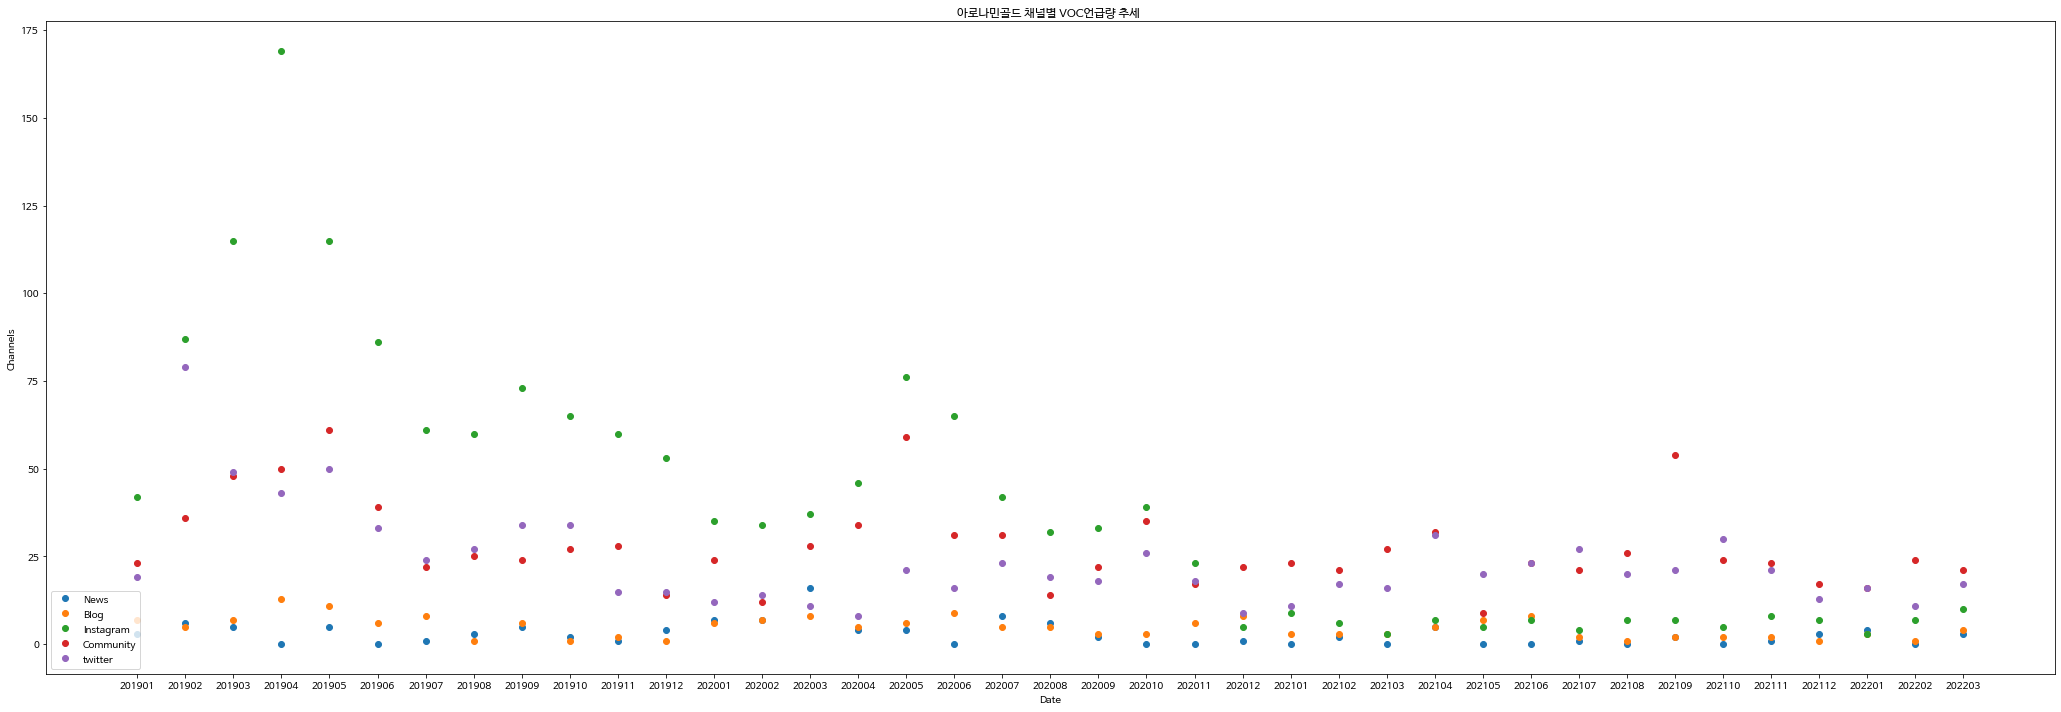

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 


plt.figure(figsize=(36, 12))
plt.plot_date(aro_pivot['연월'], news_monthly_total, label="News")
plt.plot_date(aro_pivot['연월'], blog_monthly_total, label="Blog")
plt.plot_date(aro_pivot['연월'], instagram_monthly_total, label="Instagram")
plt.plot_date(aro_pivot['연월'], community_monthly_total, label="Community")
plt.plot_date(aro_pivot['연월'], twitter_monthly_total, label="twitter")


#plt.grid(True)
plt.legend(loc=3) # 범례 
plt.title("아로나민골드 채널별 VOC언급량 추세 ")
plt.xlabel("Date")
plt.ylabel("Channels") 
plt.show()

In [ ]:
aro1 = aro.groupby('분류')['연월'].count().to_frame()
aro1
labels = aro['분류'].unique()
labels

array(['기사', '블로그', '인스타그램', '커뮤니티', '트위터'], dtype=object)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


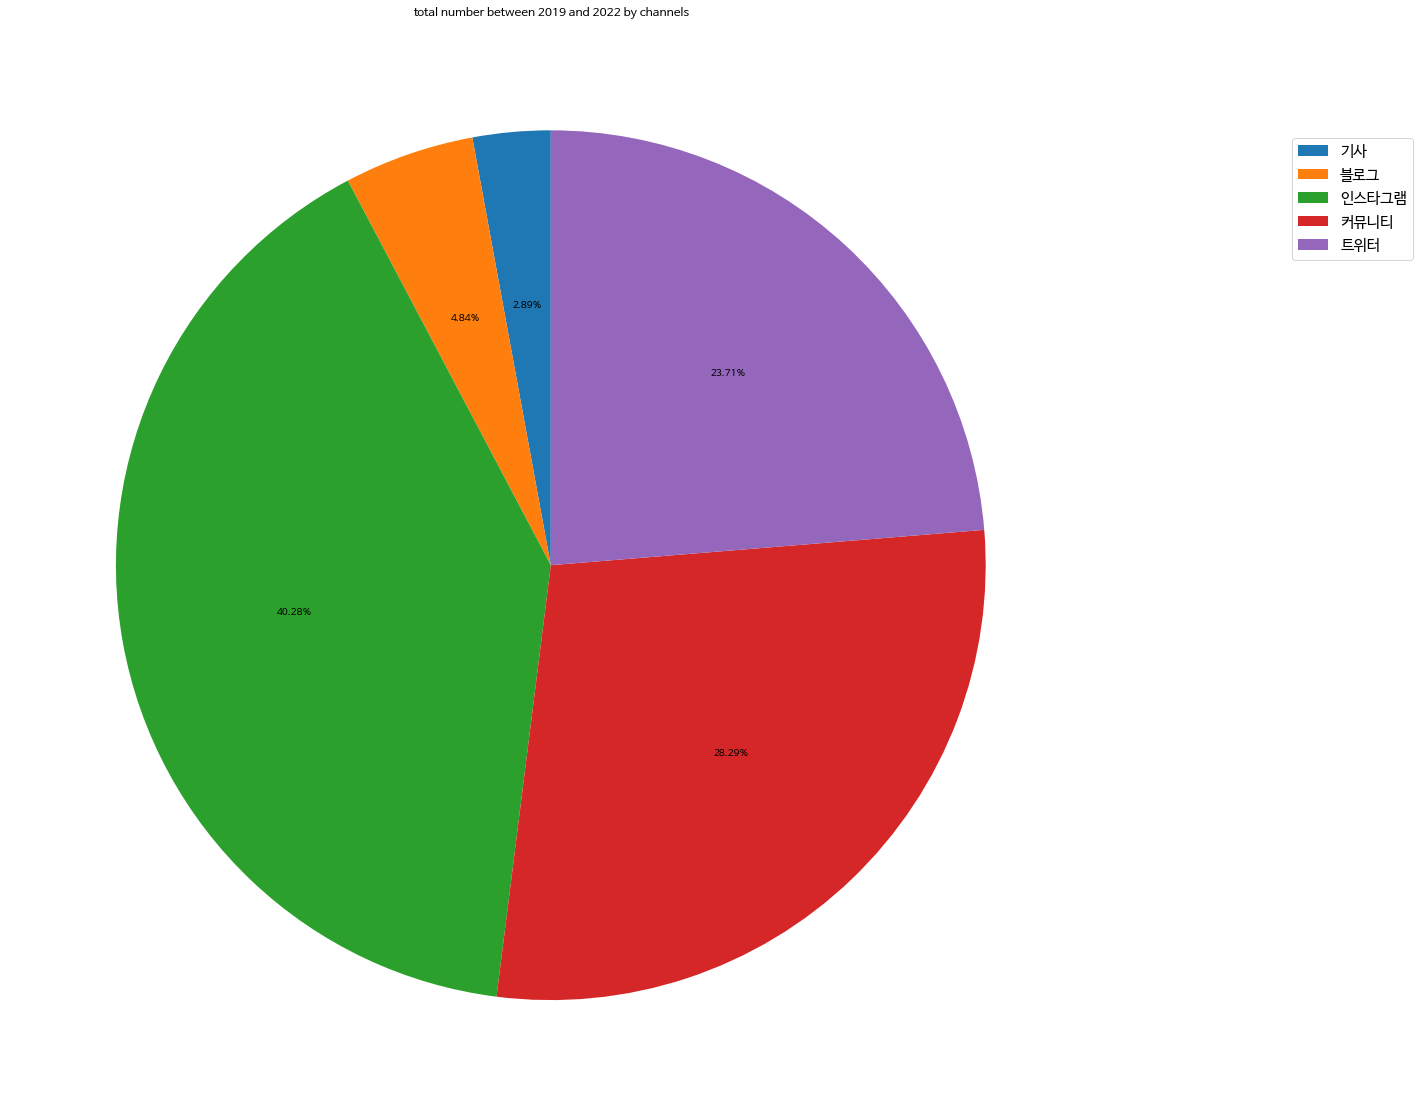

In [ ]:
fm._rebuild()
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))
plt.pie(aro1, startangle=90, autopct='%.2f%%')
plt.title('total number between 2019 and 2022 by channels')
plt.legend(labels, loc='upper right', bbox_to_anchor = (1.3, 0.9), fontsize=15) # location legend
plt.rc('font', family=font_name)
plt.show()